<h1><center> R to Python<br><br>Marketing Research and Analytics<br><br>CHAPTER 7: Identifying drivers of outcomes: Linear Models</center></h1>

This tutorial aims at providing the python code for the book *R for Marketing Research and Analytics* (Chapman, Christopher N., McDonnell Feit, Elea). We will follow the chapters of the book and provide a Python version of the R code presented in the book.
<br>In this tutorial, we tackle chapter 7 of the book. Please look at the other tutorials for other chapters.

## STEP 1: Importing the required libraries

In [3]:
#Libraries for data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd
import datetime
from datetime import date
from dateutil.relativedelta import relativedelta
import calendar
from sklearn.feature_selection import chi2
from io import StringIO
import scipy as sp
from scipy import stats
import astropy
from astropy import stats
from statsmodels.distributions.empirical_distribution import ECDF
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd
#Libraries for data visualization
import seaborn as sns
import matplotlib.pyplot as plt
#Below code allows for the graphs to be plotted directly under the coding cell
%matplotlib inline 
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 11, 7

C:\Users\cdague\AppData\Local\Continuum\anaconda2\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


## STEP 2: Importing the dataset for satisfaction data

In [4]:
#Import csv file 
sat_df=pd.read_csv("amusement_park.csv")

## STEP 3: Preliminary data inspection

In [5]:
sat_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
weekend      500 non-null object
num.child    500 non-null int64
distance     500 non-null float64
rides        500 non-null int64
games        500 non-null int64
wait         500 non-null int64
clean        500 non-null int64
overall      500 non-null int64
dtypes: float64(1), int64(6), object(1)
memory usage: 31.3+ KB


In [6]:
sat_df.head()

,weekend,num.child,distance,rides,games,wait,clean,overall
0,yes,0,114.648259,87,73,60,89,47
1,yes,2,27.014097,87,78,76,87,65
2,no,1,63.300975,85,80,70,88,61
3,yes,0,25.909931,88,72,66,89,37
4,no,4,54.718307,84,87,74,87,68


In [7]:
sat_df.describe()

,num.child,distance,rides,games,wait,clean,overall
count,500.000000,500.000000,500.00000,500.000000,500.000000,500.000000,500.000000
mean,1.738000,31.047509,85.84600,78.666000,69.896000,87.898000,51.258000
std,1.495938,33.145445,5.46278,8.123202,10.770757,5.115068,15.878655
min,0.000000,0.526723,72.00000,57.000000,40.000000,74.000000,6.000000
25%,0.000000,10.318091,82.00000,73.000000,62.000000,84.000000,40.000000
50%,2.000000,19.019093,86.00000,78.000000,70.000000,88.000000,50.000000
75%,3.000000,39.582050,90.00000,85.000000,77.000000,91.000000,62.000000
max,5.000000,239.192134,100.00000,100.000000,100.000000,100.000000,100.000000


In [8]:
#Describe the categorical variable
sat_df.describe(include=['O'])

,weekend
count,500
unique,2
top,no
freq,259


**Classification of variables**
- Categorical: weekend
- Numerical: 
    - Continuous:distance
    - Discrete: num.child, rides, games, wait, clean, overall

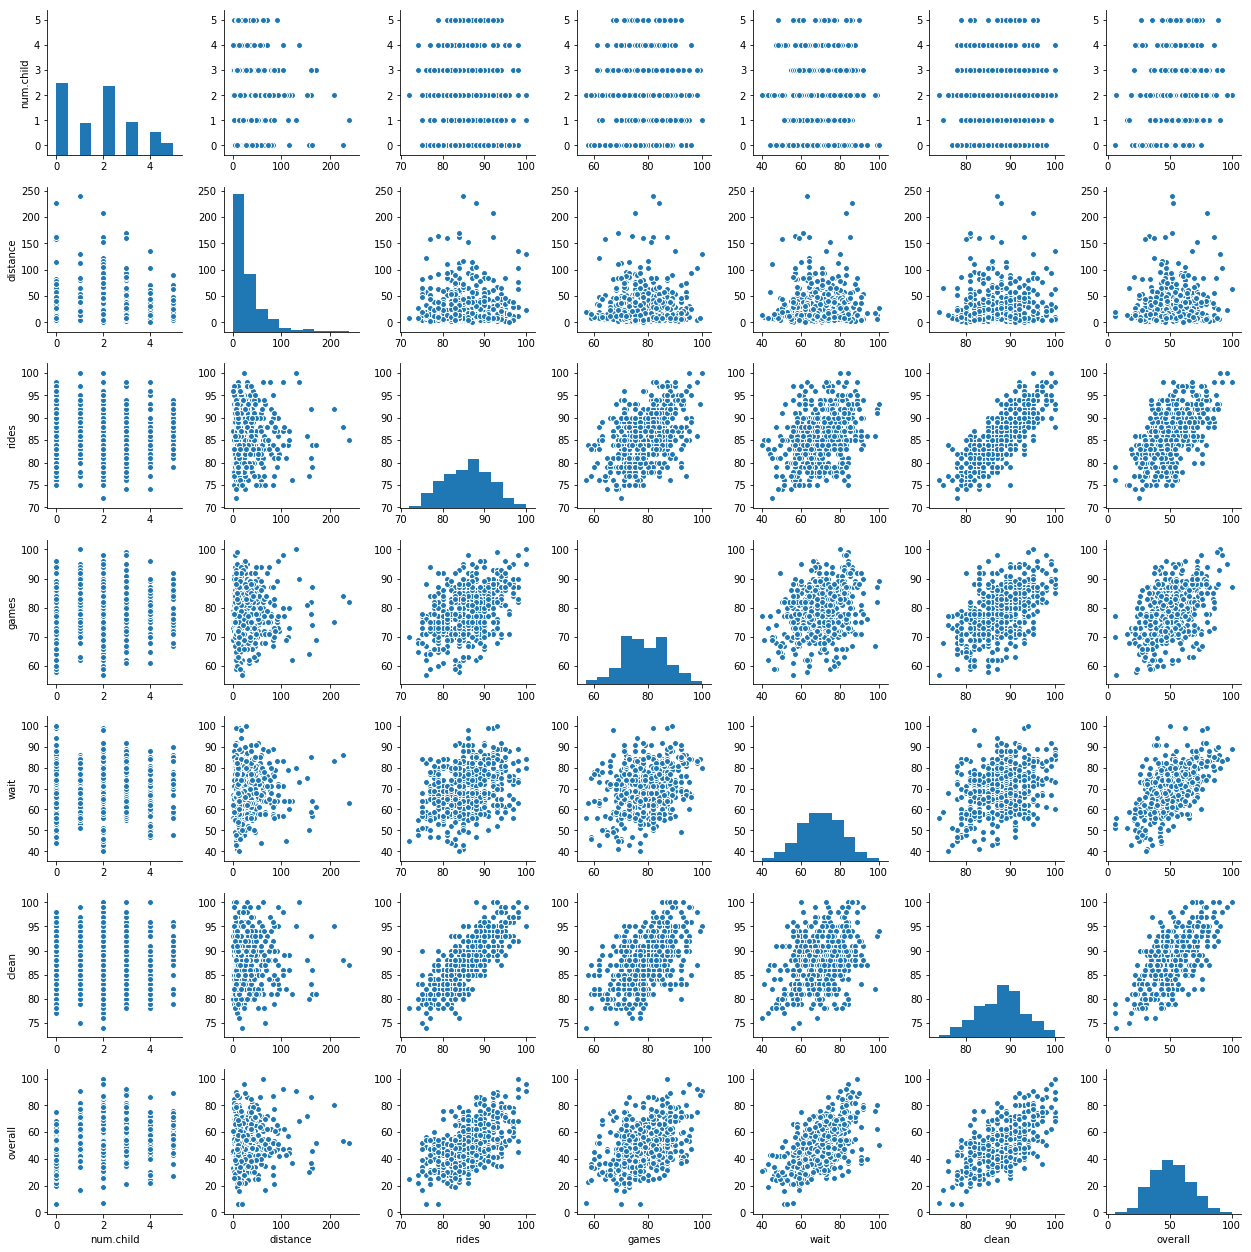

In [11]:
#Visualize the data
sns.pairplot(sat_df)

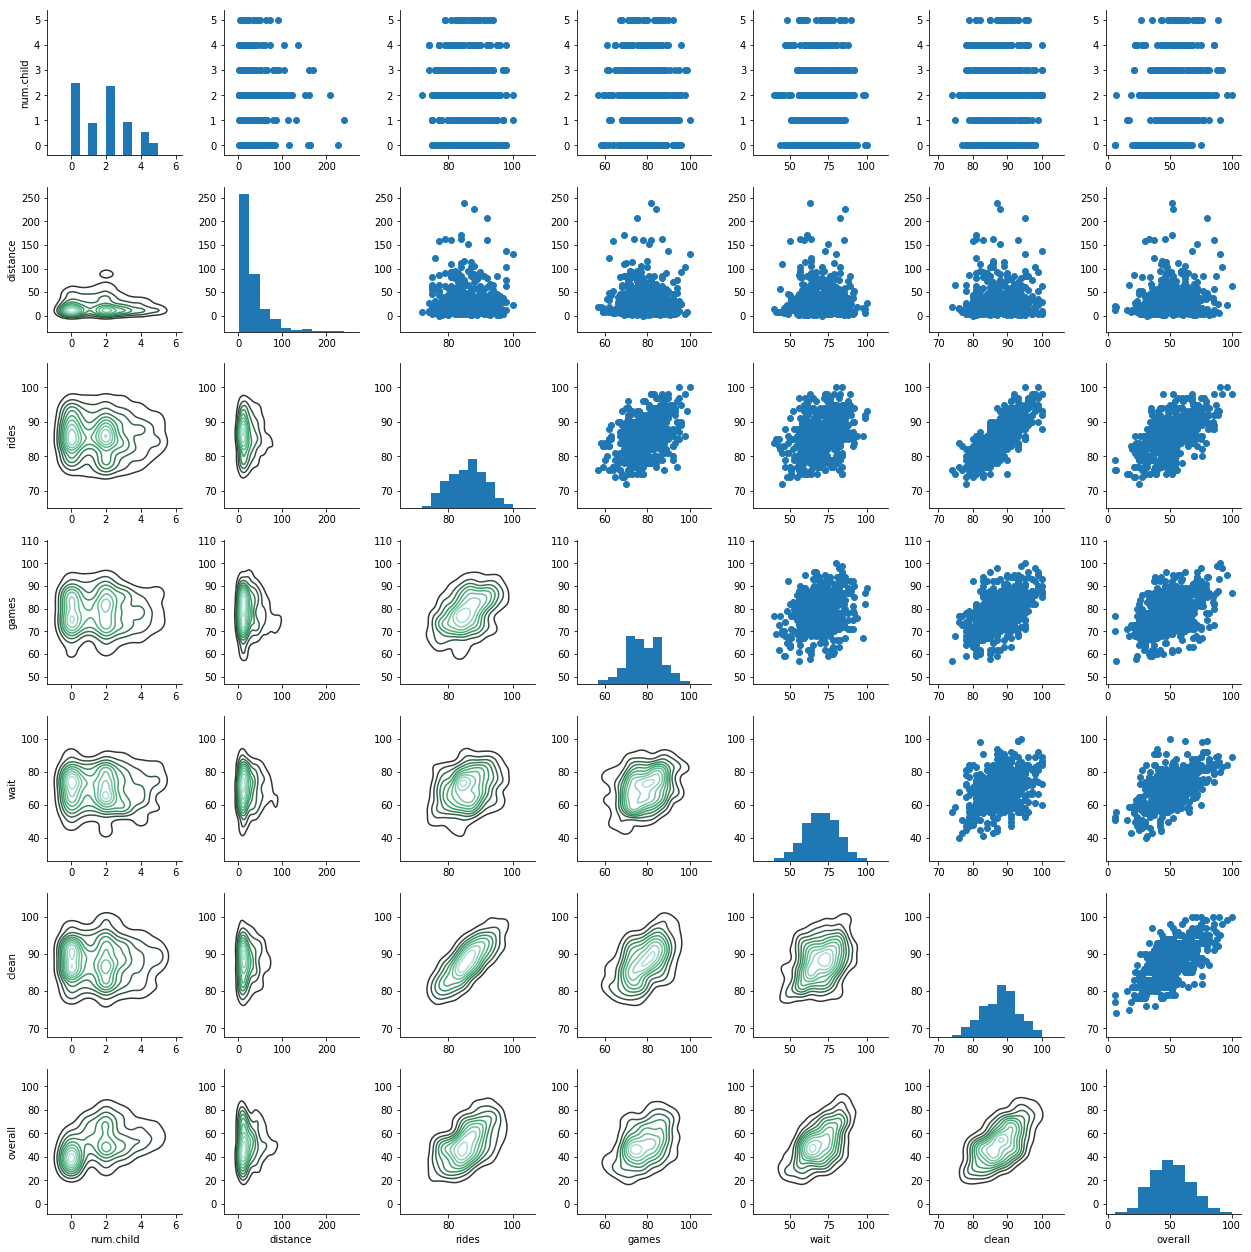

In [13]:
#Grid plot and then display different types of graphs (more complicated version of Pairplot)
g=sns.PairGrid(sat_df)
g.map_diag(plt.hist)
g.map_lower(sns.kdeplot)
g.map_upper(plt.scatter)

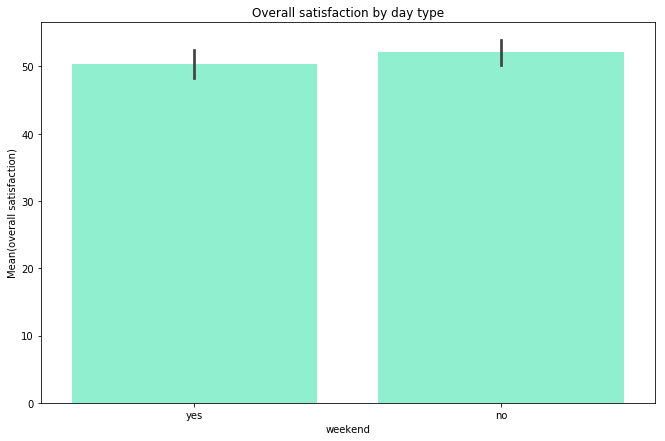

In [9]:
#Barplot
sns.barplot(x='weekend',
            y='overall',
            data=sat_df,
            color='aquamarine')
plt.title('Overall satisfaction by day type')
plt.ylabel('Mean(overall satisfaction)')
plt.show()

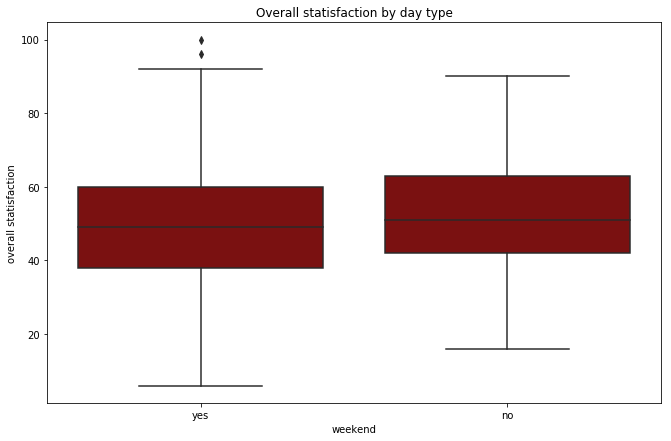

In [10]:
#Boxplot
sns.boxplot(x='weekend',
            y='overall',
            data=sat_df,
            color='darkred')
plt.title('Overall statisfaction by day type')
plt.ylabel('overall statisfaction')
plt.show()

In [11]:
#Distance is skewed to the left so we take the log of distance
sat_df['logdist']=np.log(sat_df['distance'])

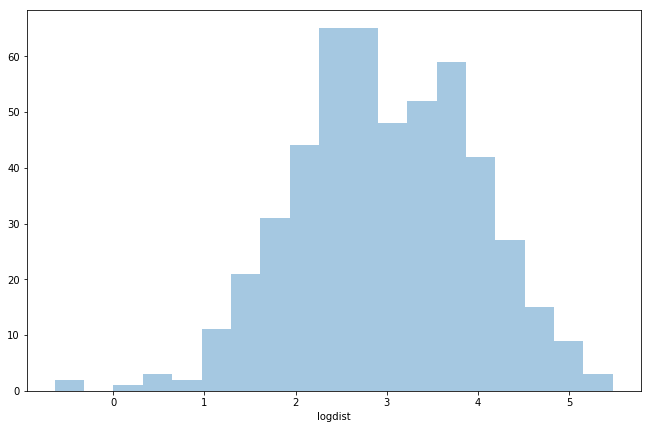

In [12]:
#Look at the distribution of logdistance
sns.distplot(sat_df['logdist'],
             kde=False) #This variable displays a somewhat normal distribution

In [ ]:
#Correlation heatmap between variables

<font color=red>R code</font>: *Correlation heatmap*
<br>$corrplot.mixed(cor(sat{\_}df[,c(2,4:9)]),\,upper="ellipse")$

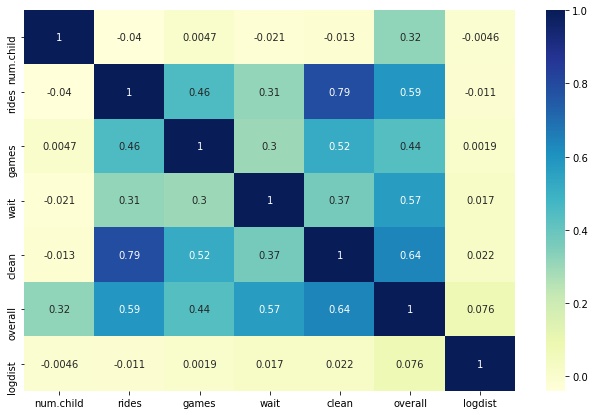

In [13]:
sat_df1=sat_df.iloc[:, [1,3,4, 5, 6, 7, 8]]
sns.heatmap(sat_df1.corr(),
            annot=True,
            cmap='YlGnBu')

<font color=orange>**Let's do some interpretation**</font>:
<br>Clean and rides are kinda correlated but r<0.9 so can keep it like that. On initial inspection, it appears acceptable to proceed with modeling including all the variables.

<font color=green>**Cracking the code**</font>: **sns.heatmap**
<br>Plot rectangular data as a color-encoded matrix.
<br>**Syntax**: $sns.heatmap(data,\,cmap,\,vmin\,vmax)$
<br>**Reference**: https://seaborn.pydata.org/generated/seaborn.heatmap.html

## STEP 4: Bivariate associations

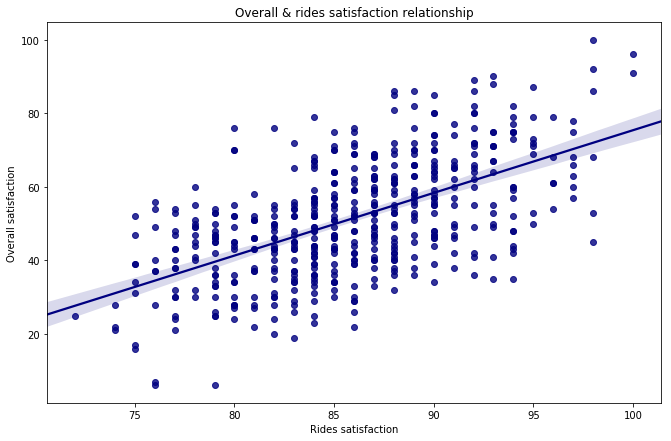

In [20]:
#Overall and rides
sns.regplot(x='rides',
            y='overall',
            data=sat_df,
            color='navy')
plt.xlabel('Rides satisfaction')
plt.ylabel('Overall satisfaction')
plt.title('Overall & rides satisfaction relationship')
plt.show()

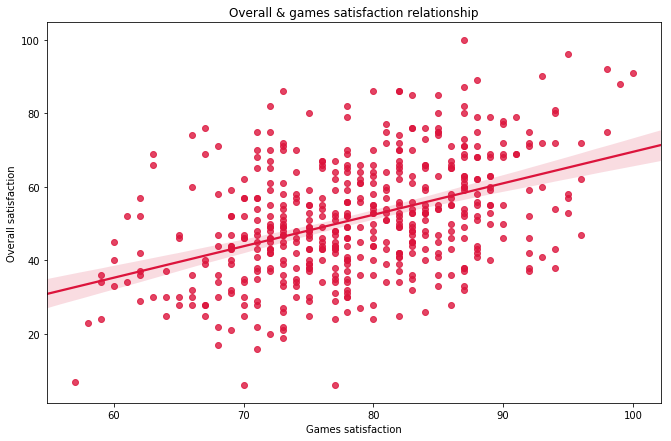

In [25]:
#Overall and games
sns.regplot(x='games',
            y='overall',
            data=sat_df,
            color='crimson')
plt.xlabel('Games satisfaction')
plt.ylabel('Overall satisfaction')
plt.title('Overall & games satisfaction relationship')
plt.show()

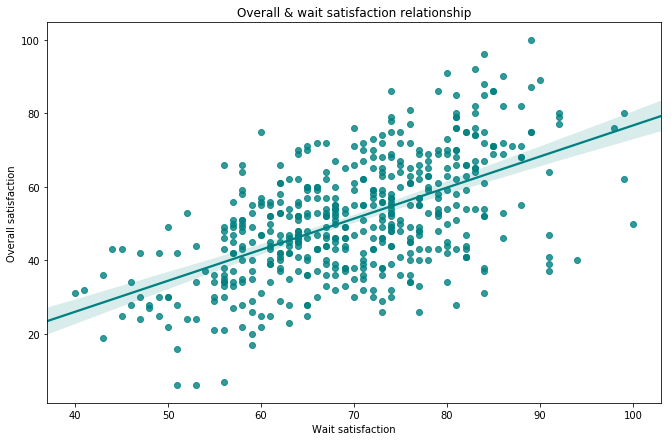

In [26]:
#Overall and wait
sns.regplot(x='wait',
            y='overall',
            data=sat_df,
            color='teal')
plt.xlabel('Wait satisfaction')
plt.ylabel('Overall satisfaction')
plt.title('Overall & wait satisfaction relationship')
plt.show()

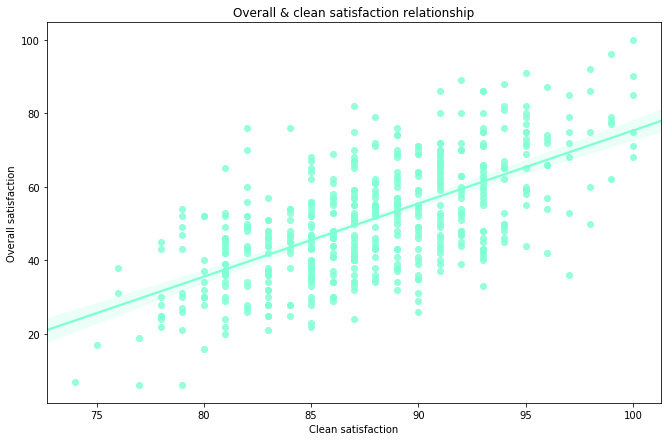

In [27]:
#Overall and clean
sns.regplot(x='clean',
            y='overall',
            data=sat_df,
            color='aquamarine')
plt.xlabel('Clean satisfaction')
plt.ylabel('Overall satisfaction')
plt.title('Overall & clean satisfaction relationship')
plt.show()

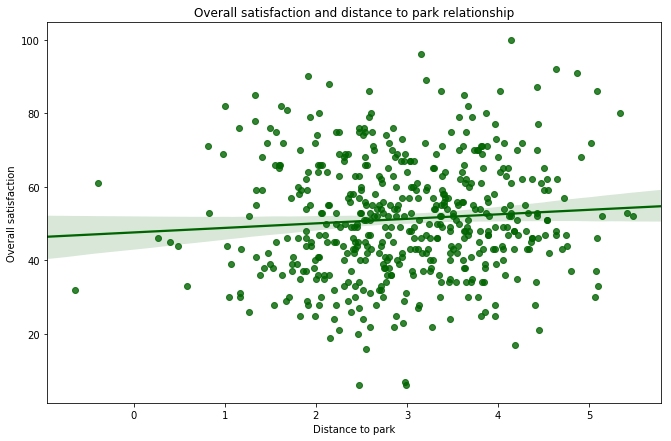

In [29]:
#Overall and logdistance
sns.regplot(x='logdist',
            y='overall',
            data=sat_df,
            color='darkgreen')
plt.xlabel('Distance to park')
plt.ylabel('Overall satisfaction')
plt.title('Overall satisfaction and distance to park relationship')
plt.show()

<font color=green>**Cracking the code**</font>: **sns.regplot**
<br>Plot data and a linear regression model fit.
<br>**Syntax**: $sns.regplot(x,\,y,\,data)$
<br>**Reference**: https://seaborn.pydata.org/generated/seaborn.regplot.html

## STEP 5: Linear Model with a single predictor

<font color=red>R code</font>: *lm*
<br>$lm(overall \sim rides,\, data=seg{\_}df)$

In [14]:
#Python code:
#Import the sklearn library
from sklearn.linear_model import LinearRegression

In [15]:
#Define the regressor
lm=LinearRegression()

In [16]:
#Define X (independent variables) and y (dependent variable)
X=sat_df.drop(['num.child', 'weekend', 'distance', 'logdist', 'overall'], axis=1)
y=sat_df.loc[:,'overall']

In [17]:
#Split dataset into training and test set
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

C:\Users\cdague\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [18]:
#Fit the model
m1=lm.fit(X_train,y_train)

In [19]:
# Predicting the Test set results
y_pred = m1.predict(X_test)

In [20]:
#Training-Test accuracy
print("Training set score:{}".format(m1.score(X_train, y_train)))
print("Test set score:{}".format(m1.score(X_test, y_test)))

Training set score:0.552893285298
Test set score:0.578002699534


In [21]:
#Display intercept and coefficients
print("Intercept of regression:{}".format(m1.intercept_))
print("Coefficients of regression:{}".format(m1.coef_))
print(pd.DataFrame(zip(X.columns, m1.coef_), columns=['Features', 'EstimatedCoef']))

Intercept of regression:-129.931979593
Coefficients of regression:[0.52384042 0.1498623  0.53890902 0.98900984]
  Features  EstimatedCoef
0    rides       0.523840
1    games       0.149862
2     wait       0.538909
3    clean       0.989010


In [22]:
#Checking model performance
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [23]:
#Display the MSE: Mean Squared Error
mean_squared_error(y_test, y_pred)

116.3394229720542

<font color=blue>**The Maths behind it**</font>: **Mean Squared Error**
<br>The Mean Squared Error (MSE) or Mean squared deviation (MSD) of an estimator measures the average of the squares of the errors. The smaller the MSE, the closer you are to finding the line of best fit.
<br>If $\hat{Y}$ is a vector of $n$ predictors, and $Y$ is the vector of observed values of the variable being predicted, then MSE is defined as below:
$$\operatorname{MSE}=\frac{1}{n}\sum_{i=1}^{n}(Y_{i}-{\hat{Y_{i}}})^{2}.
$$
*To go further*: http://www.statisticshowto.com/mean-squared-error/

In [24]:
#Display Mean Absolute Error(MAE)
mean_absolute_error(y_test, y_pred)

8.530195157108004

<font color=blue>**The Maths behind it**</font>: **Mean Absolute Error**
<br>The Mean Absolute Error (MAE) measures the average magnitude of the errors in a set of predictions. Taking the same notation as above, the MAE is defined as below:
$$\operatorname{MAE}=\frac{1}{n}\sum_{i=1}^{n}\mid Y_{i}-{\hat{Y_{i}}}\mid
$$
*To go further*: http://www.statisticshowto.com/absolute-error/

In [25]:
#Display R2 score
r2_score(y_test, y_pred)

0.5780026995336236

<font color=blue>**The Maths behind it**</font>: **R-squared**
<br>R-squared, also called **coefficient of determination**, is the proportion of the variance in the dependent variable that is predictable from the independent variable(s). You can calculate $R^2$ using three different metrics.
- The **total sum of squares**: $\operatorname{SS_{tot}}=\sum_{i=1}^{n}(Y_{i}-{\overline{Y}})^2$, where $\overline{Y}=\frac{1}{n}\sum_{i=1}^{n}Y_{i}$
- The **explained sum of squares** (regression sum of squares): $\operatorname{SS_{reg}}=\sum_{i=1}^{n}(\hat{Y_{i}}-{\overline{Y}})^2$
- The **residual sum of squares**: $\operatorname{SS_{res}}=\sum_{i=1}^{n}({Y_{i}}-{\hat{Y_{i}}})^2$

The formula for $R^2$ is then given as below:
$$\operatorname{R^2}\equiv 1-\frac{SS_{res}}{SS_{tot}} \equiv \frac {SS_{reg}}{SS_{tot}} $$

Here are a few basic characteristics of the coefficient of determination:
- It is always a number between $0$ and $1$
- If $R^2=1$, the model explains perfectly variations of the response data around its mean.
- If $R^2=0$, the model explains none of the variability of the response data around its mean.

**Key limitations of R-squared**:
- R-squared cannot determine whether the cofficient estimates are biased. You need to assess this with a residual plot.
- Everytime you add a predictor to a model, the R-squared increases, even due to chance alone.
- If a model has too many predictors and higher order polynomials, it begins to model the random noise in the data. It will produce misleadingly high R-squared values.

*To go further*: https://newonlinecourses.science.psu.edu/stat501/node/255/

<font color=blue>**The Maths behind it**</font>: **Adjusted R-squared**
<br>As R-squared, adjusted R-squared shows how well data points fit a cruve or line, but adjusts for the number of terms in a model. Hence, if you add more **useful** predictors, adjusted R-squared will increse. But if you add a predictor that does not affect the dependent variable then adjusted R-squared does not increase.
<br>Adjusted $R^2$ can be mathematically defined as below:
$$\operatorname {R_{adj}^2} = 1- \frac {(1-R^2)(n-1)}{n-k-1}, 
$$
where $n$ is the number of observations in your sample, $k$ is the number of independent regressors.
<br>*To go further*: https://www.listendata.com/2014/08/adjusted-r-squared.html

Text(0,0.5,u'Residuals')

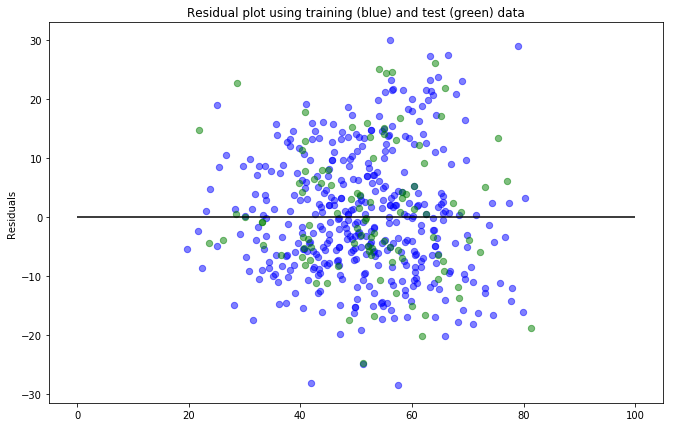

In [26]:
#Plot residuals
plt.scatter(m1.predict(X_train), m1.predict(X_train)-y_train, c='b', s=40, alpha=0.5)
plt.scatter(m1.predict(X_test), m1.predict(X_test)-y_test, c='g', s=40, alpha=0.5)
plt.hlines(y=0, xmin=0, xmax=100)
plt.title('Residual plot using training (blue) and test (green) data')
plt.ylabel('Residuals')

<font color=orange>**Let's do some interpretation**</font>:
<br>A residual plot has the residual values on the vertical axis and the fitted values on the horizontal axis. This plot is generally used to detect problems in the model. If the points in a residual plot are randomly dispersed around the horizontal axis, a linear regression model is appropriate for the data.
<br>Below residual plots display patterns that indicate an inappropriate model.
1. **U-shaped**: suggest a better fit for a non linear model
<img src="U_shaped.jpg" width="200">
2. **Outlier**
<img src="outlier.jpg" width="200">

#### Linear Regression with statsmodels package

In [27]:
import statsmodels.api as sm
X1=sat_df['rides']
y1=sat_df['overall']
model=sm.OLS(y1, X1).fit()
predictions=model.predict(X1)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                overall   R-squared:                       0.930
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                     6630.
Date:                Wed, 06 Jun 2018   Prob (F-statistic):          2.60e-290
Time:                        08:18:26   Log-Likelihood:                -2035.9
No. Observations:                 500   AIC:                             4074.
Df Residuals:                     499   BIC:                             4078.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
rides          0.6015      0.007     81.424      0.000       0.587       0.616
==============================================================================
Omnibus:                        3.509   Durbin-Watson:                   2.165
Prob(Omnibus):                  0.173   Jarque-Bera (JB):                3.498
Skew:                           0.172   Prob(JB):                        0.174
Kurtosis:                       2.777   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<font color=orange>**Let's do some interpretation**</font>:
<br><font color=teal>**F-statistic**</font>:
<br>An F-statistic is a value that we get when running a regression analysis to test the following null hypothesis.

$$H_{0}:all\,the\,coefficients\,of\,the\,predictors\,are\,equal\,to\,0.$$
$$H_{a}:there\,exists\,some\,non\,null\,coefficient(s)$$

*Above case*: $\operatorname{Prob}(F-statistic)<< 0.05$, hence we can reject the null hypothesis. There does exist some non null coefficient (here only one predictor so we know that our predictor is significant).

<br><font color=teal>**Durbin-Watson**</font>:
<br>The Durbin Watson Test is a measure of autocorrelation (also called serial correlation) in residuals from regression analysis. Autocorrelation can lead to underestimates of the standard error and can cause you to affirm that predictors are significant when they are not. The hypotheses for the Durbin Watson test are as follows:

$$H_{0}: no\,first\,order\,autocorrelation$$
$$H_{a}:first\,order\,correlation\,exists$$

The Durbin Watson test reports a test statistic with values ranging from 0 to 4:
- $2$ = no autocorrelation
- $0\,to\,<2$ = positive autocorrelation
- $>2\,to\,4$ = negative autocorrelation

*Above case*: Durbin-Watson stat is 2.2, hence we can say there is no or a small negative autocorrelation.

<br><font color=teal>**Jarque-Bera**</font>:
<br>The Jarque-Bera test is a **test for normality**. The hypotheses for the JB test are as follows:

$$H_{0}:data\,is\,normally\,distributed$$
$$H_{a}:data\,does\,not\,come\,from\,a\,normal\,distribution$$

*Above case*: $\operatorname{Prob(JB)}>>0.05$, hence we cannot reject the null hypothesis. The data is normally distributed.

<br><font color=teal>**AIC**</font>:
<br>The **Akaike Information Criterion (AIC)** is an estimator of the relative quality of statistical models for a given set of data. Given a collection of models for the data, AIC estimates the quality of each model, relative to each of the other models. AIC provides a means for model selection. The model with the lowest AIC is preferred.
<br>Let $k$ be the number of estimated parameters in the model. Let $\hat{L}=p(x|\hat\theta, M)$ be the maximum value of the likelihood function for the model ($\hat{\theta}$ are the parameter values that maximize the likelihood function. Then the AIC value of the model is given as below:

$$\operatorname{AIC}=2k-2\ln{(\hat{L})}$$

<font color=teal>**BIC**</font>:
<br>The **Bayesian Information Criterion (BIC)**, or Shwarz criterion, is a criterion for model selection among a finite set of models. The model with the lowest BIC is preferred.<br>Let $k$ be the number of estimated parameters in the model, $n$ the number of observations (sample size). Let $\hat{L}=p(x|\hat\theta, M)$ be the maximum value of the likelihood function for the model ($\hat{\theta}$ are the parameter values that maximize the likelihood function.  Then the BIC value of the model is given as below:

$$\operatorname{BIC}=\ln{(n)}k-2\ln{(\hat{L})}$$

## STEP 6: Linear Model with multiple predictors

<font color=red>R code</font>: *lm*
<br>$lm(overall \sim rides + games + wait + clean,\, data=sat{\_}df)$

In [34]:
#Python using R-like package
X2=sat_df[['rides','games', 'wait', 'clean']]
y2=sat_df['overall']
#Add an intercept to the model
exog=sm.add_constant(sat_df[['rides','games', 'wait', 'clean']]) 
model2=sm.OLS(y2, exog).fit()
predictions2=model2.predict(exog)
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                overall   R-squared:                       0.559
Model:                            OLS   Adj. R-squared:                  0.555
Method:                 Least Squares   F-statistic:                     156.6
Date:                Wed, 06 Jun 2018   Prob (F-statistic):           1.72e-86
Time:                        14:36:30   Log-Likelihood:                -1887.0
No. Observations:                 500   AIC:                             3784.
Df Residuals:                     495   BIC:                             3805.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -131.4092      8.334    -15.768      0.000    -147.783    -115.035
rides          0.5291      0.142      3.724      0.000       0.250       0.808
games          0.1533      0.069      2.220      0.027       0.018       0.289
wait           0.5533      0.048     11.573      0.000       0.459       0.647
clean          0.9842      0.160      6.156      0.000       0.670       1.298
==============================================================================
Omnibus:                       10.422   Durbin-Watson:                   1.971
Prob(Omnibus):                  0.005   Jarque-Bera (JB):               10.767
Skew:                          -0.347   Prob(JB):                      0.00459
Kurtosis:                       2.814   Cond. No.                     2.85e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.85e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<font color=orange>**Let's do some interpretation**</font>:
- **F-statistic**: $\operatorname{Prob}(F-statistic)<< 0.05$, hence we can reject the null hypothesis. There does exist some non null coefficient (here only one predictor so we know that our predictor is significant).
- **Individual p-values**: $\operatorname{P}-value << 0.05$ for *wait*, *rides*, *games*, *clean*. Hence, those predictors are all significant.
- **Durbin-Watson**: Durbin-Watson stat is 1.97, hence we can say there is no or a very small positive autocorrelation.
- **Jarque-Bera**: $\operatorname{Prob(JB)}<0.05$, hence we can reject the null hypothesis. The data is normally not distributed.

Text(0,0.5,u'Residuals')

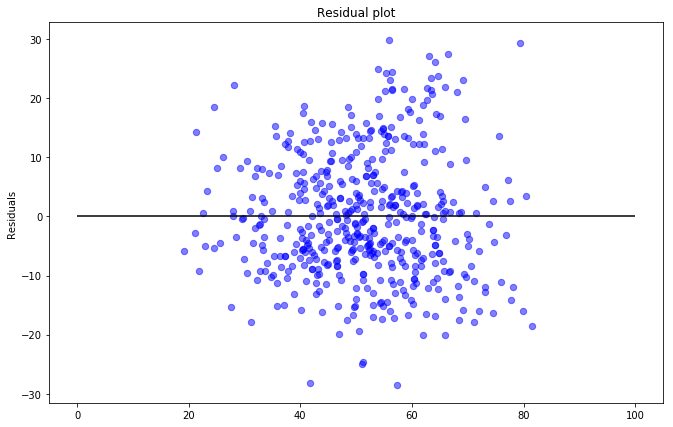

In [35]:
#Plot residuals
plt.scatter(model2.predict(exog), model2.predict(exog)-y2, c='b', s=40, alpha=0.5)
plt.hlines(y=0, xmin=0, xmax=100)
plt.title('Residual plot')
plt.ylabel('Residuals')

#### Plot of coefficients

<font color=red>R code</font>: *coefplot*
<br>$coefplot(model,\,intercept=FALSE,\,ylab="Rating\,of\,feature",\,xlab="Association\,with\,Overall\,satisfaction")$

In [36]:
#Python: calculate the error bars lengths for confidence intervals
err_series = model2.params - model2.conf_int()[0]
err_series

const    16.373918
rides     0.279138
games     0.135736
wait      0.093941
clean     0.314102
dtype: float64

In [37]:
#Typically, we don't really look at intercept
coef_df = pd.DataFrame({'coef': model2.params.values[1:],
                        'err': err_series.values[1:],
                        'varname': err_series.index.values[1:]
                       })
coef_df

,coef,err,varname
0,0.529078,0.279138,rides
1,0.153336,0.135736,games
2,0.553326,0.093941,wait
3,0.984213,0.314102,clean


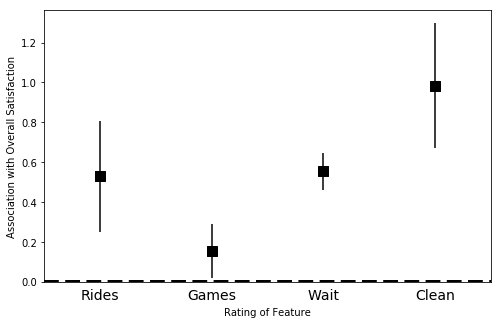

In [41]:
#Basic coefplot
fig, ax = plt.subplots(figsize=(8, 5))
coef_df.plot(x='varname', y='coef', kind='bar', 
             ax=ax, color='none', 
             yerr='err', legend=False)
ax.set_ylabel('Association with Overall Satisfaction')
ax.set_xlabel('Rating of Feature')
ax.scatter(x=pd.np.arange(coef_df.shape[0]), 
           marker='s', s=120, 
           y=coef_df['coef'], color='black')
ax.axhline(y=0, linestyle='--', color='black', linewidth=4)
ax.xaxis.set_ticks_position('none')
_ = ax.set_xticklabels(['Rides', 'Games', 'Wait', 'Clean'], 
                       rotation=0, fontsize=14)